# 01 — Exploratory Data Analysis
**Ensemble Early Parkinson Detection Using Voice Biomarkers**

This notebook explores the Oxford Parkinson's Disease Detection Dataset (UCI #174) to understand its structure, feature distributions, class balance, and multicollinearity — all of which inform our preprocessing and modeling decisions.

## 1. Setup and Data Loading

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# Load dataset
DATA_PATH = Path('../data/parkinsons/parkinsons.data')
df = pd.read_csv(DATA_PATH)

print(f'Dataset shape: {df.shape}')
print(f'Columns: {df.columns.tolist()}')

Dataset shape: (195, 24)
Columns: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [26]:
# First look at the data
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [28]:
# Confirm no missing values
print('Missing values per column:')
print(df.isnull().sum())
print(f'\nTotal missing: {df.isnull().sum().sum()}')

Missing values per column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Total missing: 0


## 2. Subject Structure

The `name` column encodes subject identity (e.g., `phon_R01_S01_1` → subject `S01`). Since each subject has ~6 recordings, we **must** use subject-wise cross-validation to prevent data leakage.

In [33]:
# Extract subject ID from the 'name' column
# Format: phon_R01_S01_1 → subject ID is the part between second and third underscore
df['subject_id'] = df['name'].apply(lambda x: x.split('_')[2])

n_subjects = df['subject_id'].nunique()
print(f'Number of unique subjects: {n_subjects}')
print(f'Total recordings: {len(df)}')
print(f'Average recordings per subject: {len(df) / n_subjects:.1f}')

Number of unique subjects: 32
Total recordings: 195
Average recordings per subject: 6.1


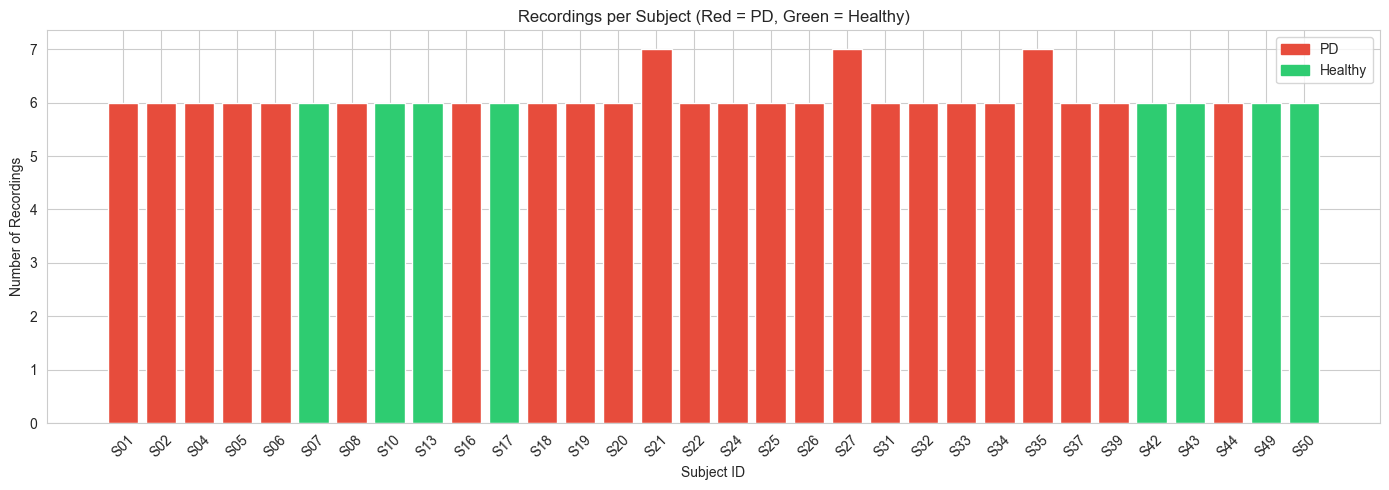


Subjects with PD: 24
Healthy subjects: 8


In [34]:
# Recordings per subject, colored by status
subject_info = df.groupby('subject_id').agg(
    n_recordings=('name', 'count'),
    status=('status', 'first')  # same status for all recordings of a subject
).reset_index()

subject_info['label'] = subject_info['status'].map({1: 'PD', 0: 'Healthy'})

fig, ax = plt.subplots(figsize=(14, 5))
colors = ['#e74c3c' if s == 1 else '#2ecc71' for s in subject_info['status']]
bars = ax.bar(subject_info['subject_id'], subject_info['n_recordings'], color=colors, edgecolor='white')
ax.set_xlabel('Subject ID')
ax.set_ylabel('Number of Recordings')
ax.set_title('Recordings per Subject (Red = PD, Green = Healthy)')
ax.tick_params(axis='x', rotation=45)

# Add legend
from matplotlib.patches import Patch
ax.legend(handles=[Patch(color='#e74c3c', label='PD'), Patch(color='#2ecc71', label='Healthy')])
plt.tight_layout()
plt.savefig('../figures/recordings_per_subject.png', bbox_inches='tight')
plt.show()

print(f"\nSubjects with PD: {subject_info['status'].sum()}")
print(f"Healthy subjects: {(subject_info['status'] == 0).sum()}")

## 3. Class Distribution

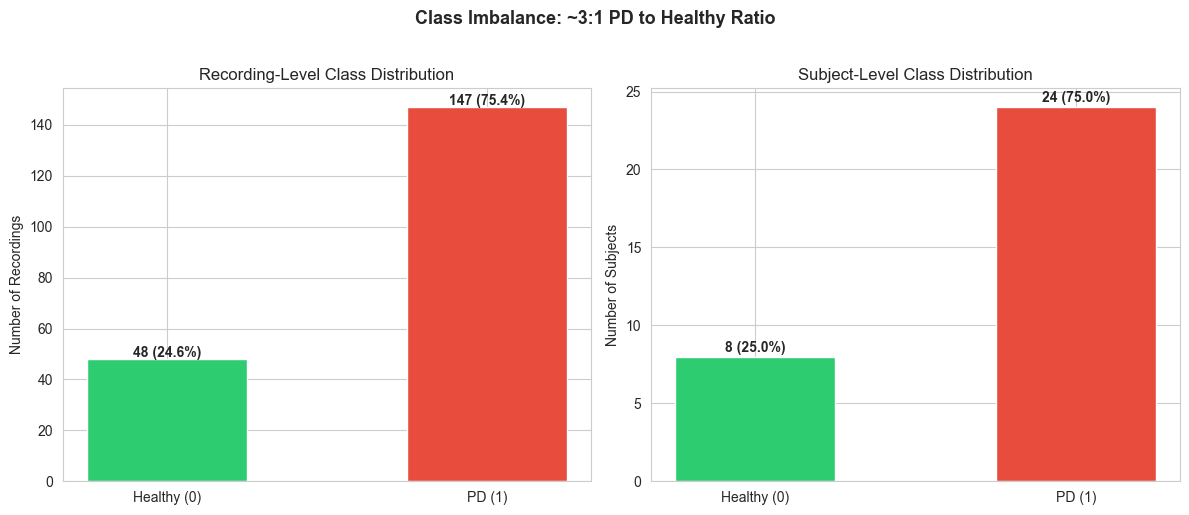

Imbalance ratio (PD:Healthy): 3.06:1
Naive majority-class accuracy: 75.4%


In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Recording-level class distribution
counts = df['status'].value_counts().sort_index()
labels = ['Healthy (0)', 'PD (1)']
colors = ['#2ecc71', '#e74c3c']

axes[0].bar(labels, counts.values, color=colors, edgecolor='white', width=0.5)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 1, f'{v} ({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')
axes[0].set_title('Recording-Level Class Distribution')
axes[0].set_ylabel('Number of Recordings')

# Subject-level class distribution
subj_counts = subject_info['status'].value_counts().sort_index()
axes[1].bar(labels, subj_counts.values, color=colors, edgecolor='white', width=0.5)
for i, v in enumerate(subj_counts.values):
    axes[1].text(i, v + 0.3, f'{v} ({v/n_subjects*100:.1f}%)', ha='center', fontweight='bold')
axes[1].set_title('Subject-Level Class Distribution')
axes[1].set_ylabel('Number of Subjects')

plt.suptitle('Class Imbalance: ~3:1 PD to Healthy Ratio', fontsize=13, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../figures/class_distribution.png', bbox_inches='tight')
plt.show()

print(f'Imbalance ratio (PD:Healthy): {counts[1]/counts[0]:.2f}:1')
print(f'Naive majority-class accuracy: {counts[1]/len(df)*100:.1f}%')

## 4. Summary Statistics

In [36]:
# Define feature columns (exclude 'name', 'status', 'subject_id')
feature_cols = [c for c in df.columns if c not in ['name', 'status', 'subject_id']]
print(f'Number of features: {len(feature_cols)}')
print(f'Features: {feature_cols}')

Number of features: 22
Features: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [37]:
# Descriptive statistics
df[feature_cols].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.2286,41.3901,88.3330,117.5720,148.7900,182.7690,260.1050
MDVP:Fhi(Hz),195.0,197.1049,91.4915,102.1450,134.8625,175.8290,224.2055,592.0300
MDVP:Flo(Hz),195.0,116.3246,43.5214,65.4760,84.2910,104.3150,140.0185,239.1700
MDVP:Jitter(%),195.0,0.0062,0.0048,0.0017,0.0035,0.0049,0.0074,0.0332
MDVP:Jitter(Abs),195.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003
MDVP:RAP,195.0,0.0033,0.0030,0.0007,0.0017,0.0025,0.0038,0.0214
MDVP:PPQ,195.0,0.0034,0.0028,0.0009,0.0019,0.0027,0.0040,0.0196
Jitter:DDP,195.0,0.0099,0.0089,0.0020,0.0050,0.0075,0.0115,0.0643
MDVP:Shimmer,195.0,0.0297,0.0189,0.0095,0.0165,0.0230,0.0379,0.1191
MDVP:Shimmer(dB),195.0,0.2823,0.1949,0.0850,0.1485,0.2210,0.3500,1.3020


In [38]:
# Compare means by class
comparison = pd.DataFrame({
    'Healthy_mean': df[df['status'] == 0][feature_cols].mean(),
    'PD_mean': df[df['status'] == 1][feature_cols].mean(),
    'Healthy_std': df[df['status'] == 0][feature_cols].std(),
    'PD_std': df[df['status'] == 1][feature_cols].std()
})
comparison['diff_pct'] = ((comparison['PD_mean'] - comparison['Healthy_mean']) / comparison['Healthy_mean'] * 100).round(1)
comparison.round(4)

,Healthy_mean,PD_mean,Healthy_std,PD_std,diff_pct
MDVP:Fo(Hz),181.9378,145.1808,52.7311,32.3480,-20.2
MDVP:Fhi(Hz),223.6368,188.4415,96.7271,88.3392,-15.7
MDVP:Flo(Hz),145.2073,106.8936,58.7571,32.2744,-26.4
MDVP:Jitter(%),0.0039,0.0070,0.0021,0.0052,80.8
MDVP:Jitter(Abs),0.0000,0.0001,0.0000,0.0000,116.8
MDVP:RAP,0.0019,0.0038,0.0011,0.0032,95.2
MDVP:PPQ,0.0021,0.0039,0.0009,0.0030,89.7
Jitter:DDP,0.0058,0.0113,0.0032,0.0097,95.2
MDVP:Shimmer,0.0176,0.0337,0.0055,0.0200,91.1
MDVP:Shimmer(dB),0.1630,0.3212,0.0578,0.2078,97.1


## 5. Feature Distributions by Class

We group features into four categories as described in the dataset documentation.

In [39]:
# Define feature groups
feature_groups = {
    'Fundamental Frequency': ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'],
    'Jitter (Frequency Perturbation)': ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'],
    'Shimmer (Amplitude Perturbation)': ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'],
    'Nonlinear & Noise': ['NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
}

# Verify all features are covered
all_grouped = [f for group in feature_groups.values() for f in group]
assert set(all_grouped) == set(feature_cols), f'Mismatch: {set(feature_cols) - set(all_grouped)}'

/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])


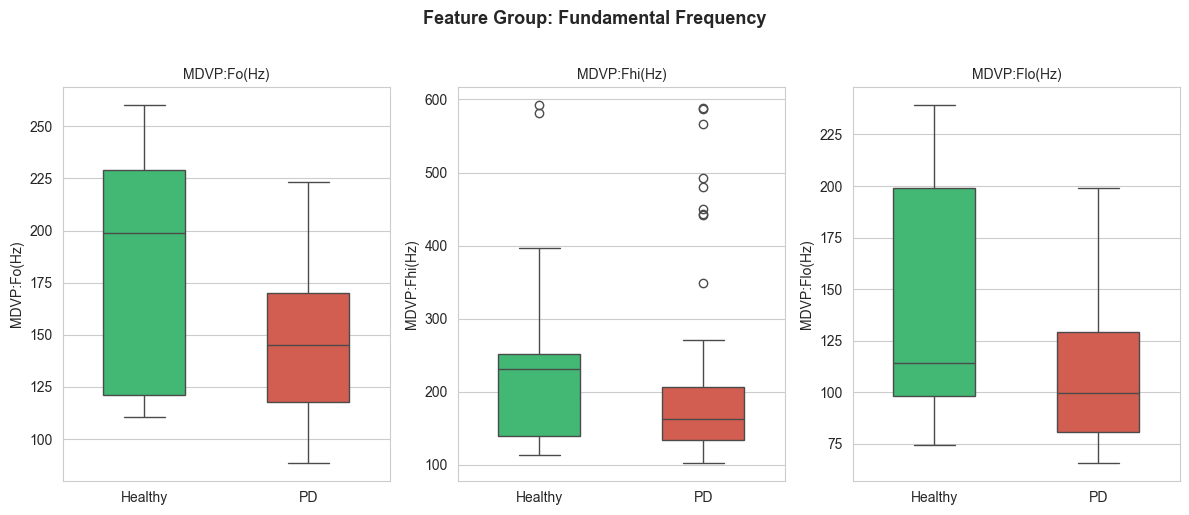

/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var

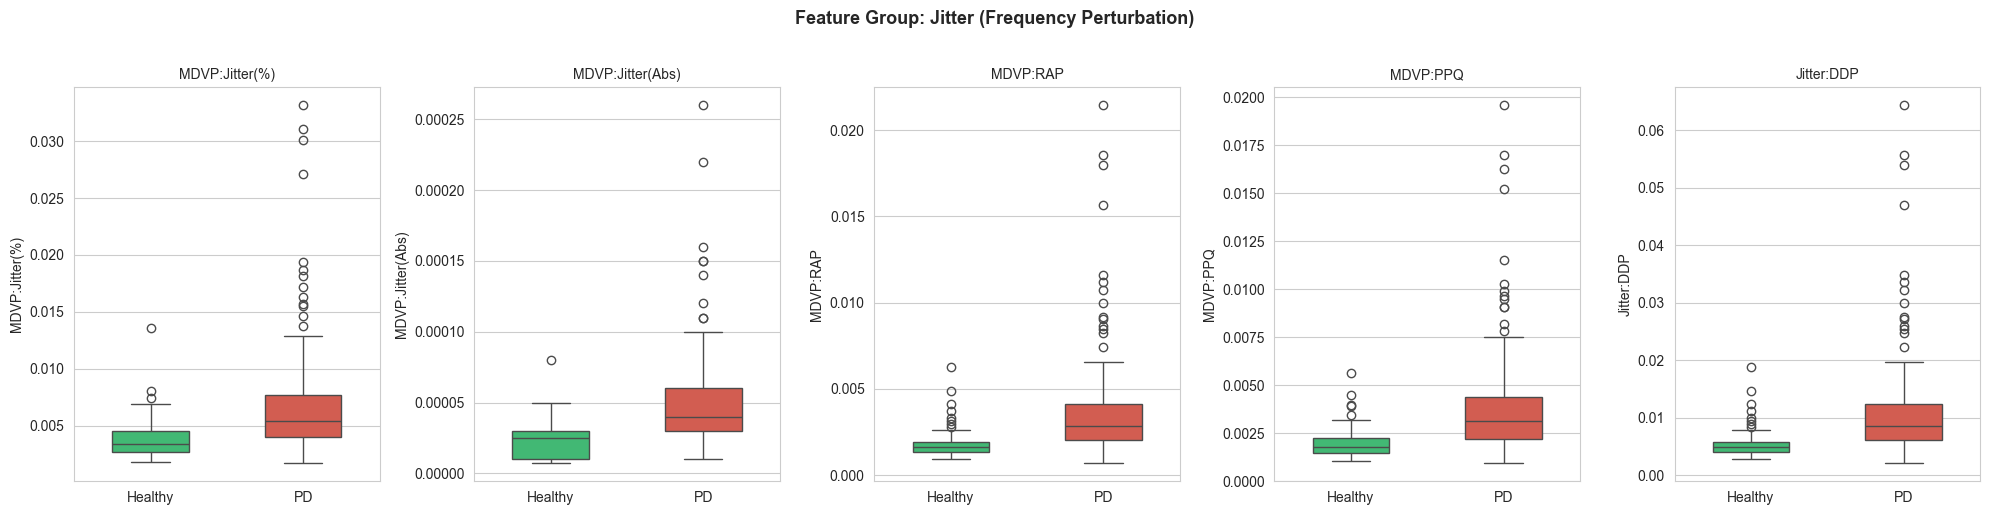

/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var

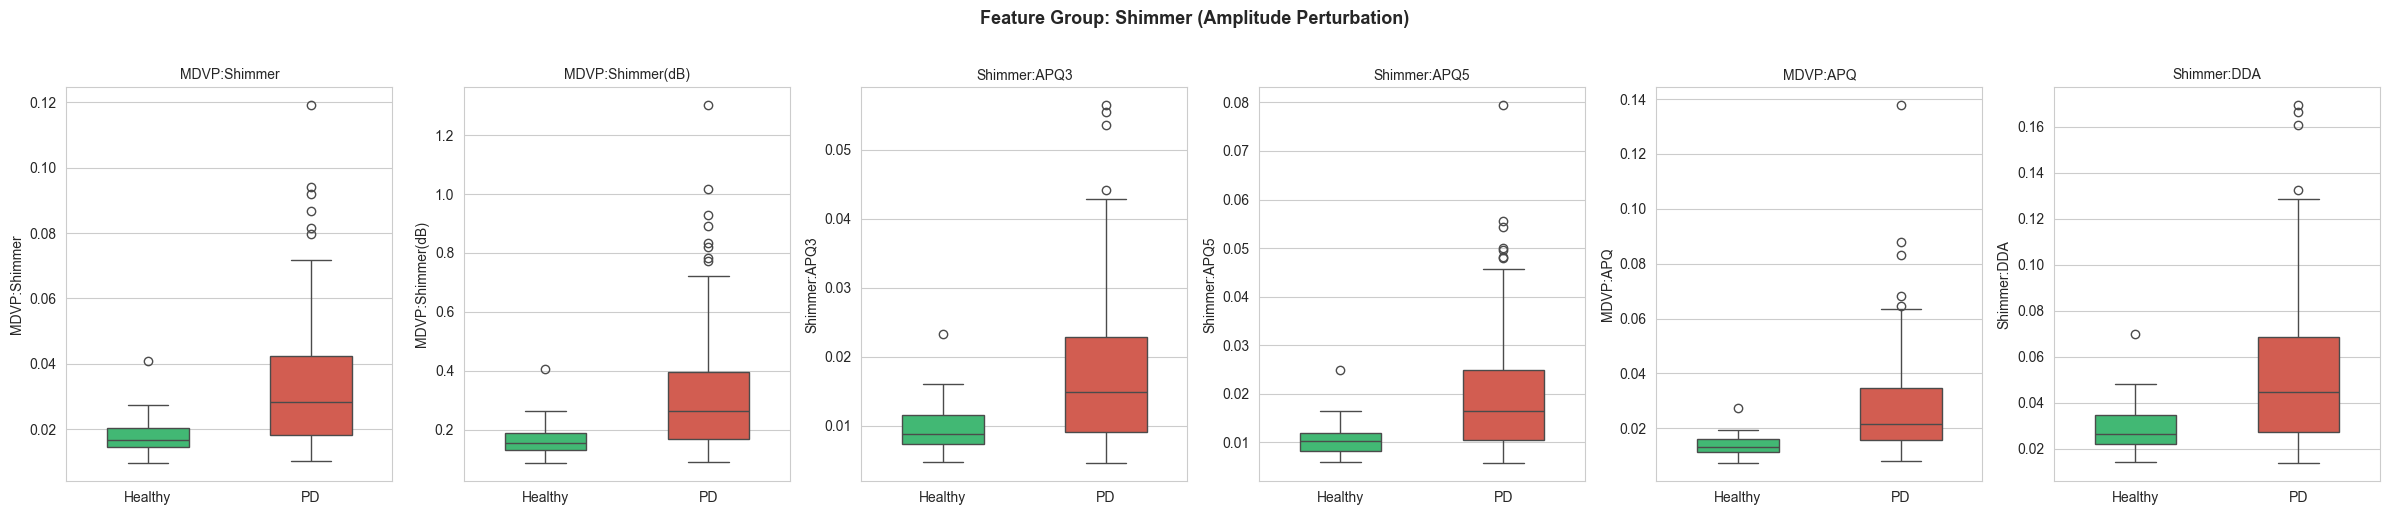

/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var/folders/y1/_gqpnlvs4xv38dm02ndxx_vr0000gn/T/ipykernel_5706/297814182.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Healthy', 'PD'])
/var

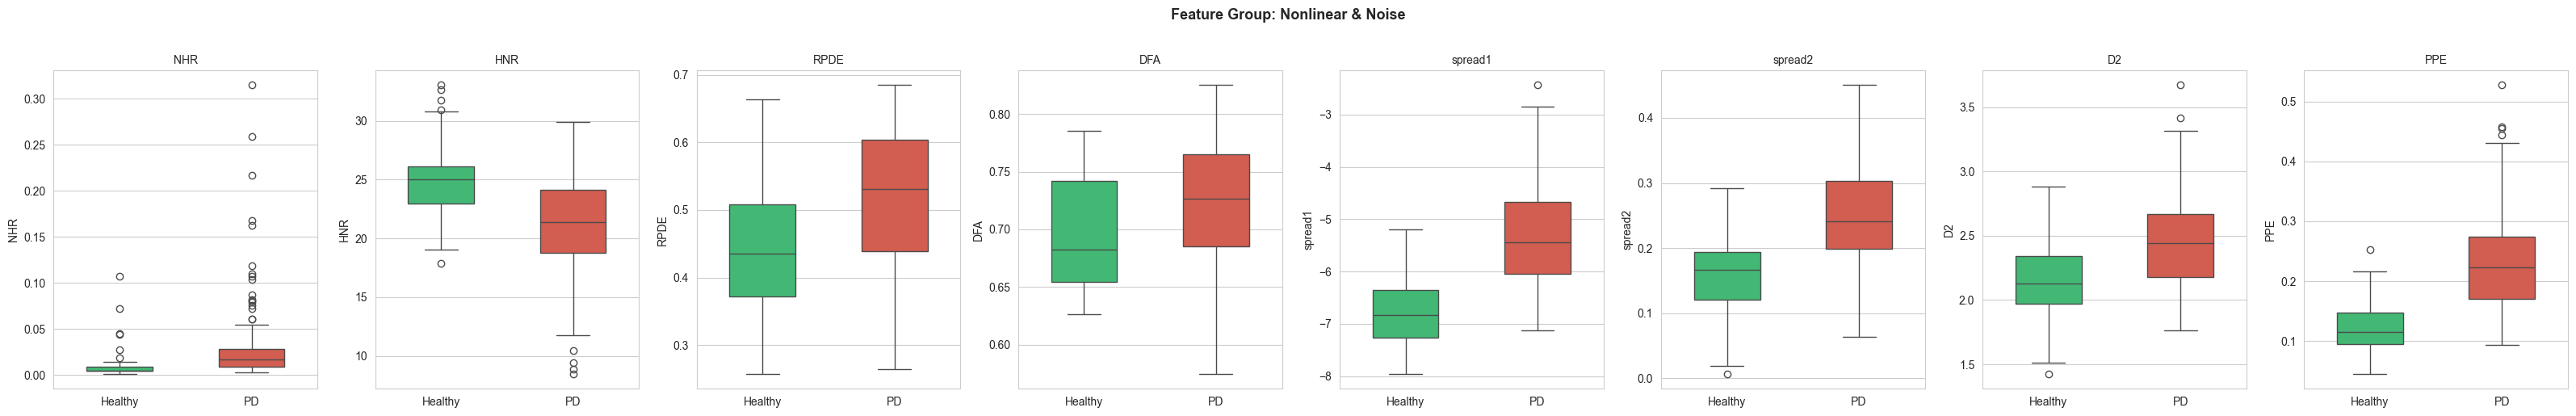

In [40]:
# Box plots by feature group
for group_name, features in feature_groups.items():
    n_feats = len(features)
    fig, axes = plt.subplots(1, n_feats, figsize=(4 * n_feats, 5))
    if n_feats == 1:
        axes = [axes]
    
    for ax, feat in zip(axes, features):
        sns.boxplot(data=df, x='status', y=feat, ax=ax,
                    hue='status', palette={0: '#2ecc71', 1: '#e74c3c'},
                    width=0.5, legend=False)
        ax.set_xticklabels(['Healthy', 'PD'])
        ax.set_xlabel('')
        ax.set_title(feat, fontsize=10)
    
    fig.suptitle(f'Feature Group: {group_name}', fontsize=13, fontweight='bold', y=1.02)
    plt.tight_layout()
    safe_name = group_name.lower().replace(' ', '_').replace('&', 'and').replace('(', '').replace(')', '')
    plt.savefig(f'../figures/boxplot_{safe_name}.png', bbox_inches='tight')
    plt.show()

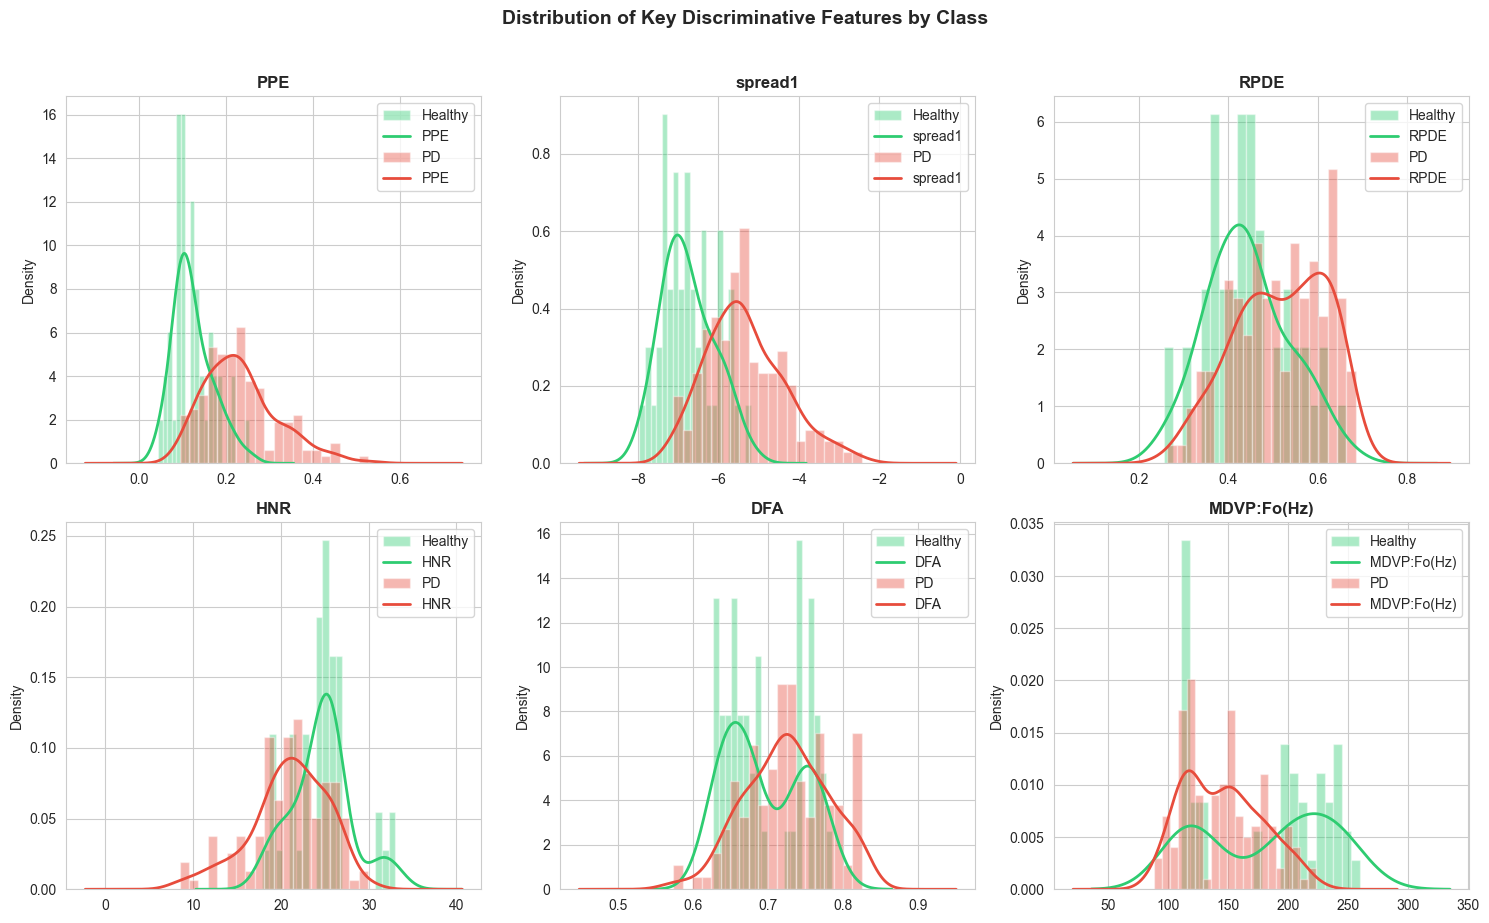

In [41]:
# KDE plots for the most discriminative features identified in literature
key_features = ['PPE', 'spread1', 'RPDE', 'HNR', 'DFA', 'MDVP:Fo(Hz)']

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
for ax, feat in zip(axes.ravel(), key_features):
    for status, color, label in [(0, '#2ecc71', 'Healthy'), (1, '#e74c3c', 'PD')]:
        subset = df[df['status'] == status][feat]
        ax.hist(subset, bins=20, alpha=0.4, color=color, label=label, density=True)
        subset.plot.kde(ax=ax, color=color, linewidth=2)
    ax.set_title(feat, fontsize=12, fontweight='bold')
    ax.legend()

plt.suptitle('Distribution of Key Discriminative Features by Class', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../figures/kde_key_features.png', bbox_inches='tight')
plt.show()

## 6. Correlation Analysis & Multicollinearity

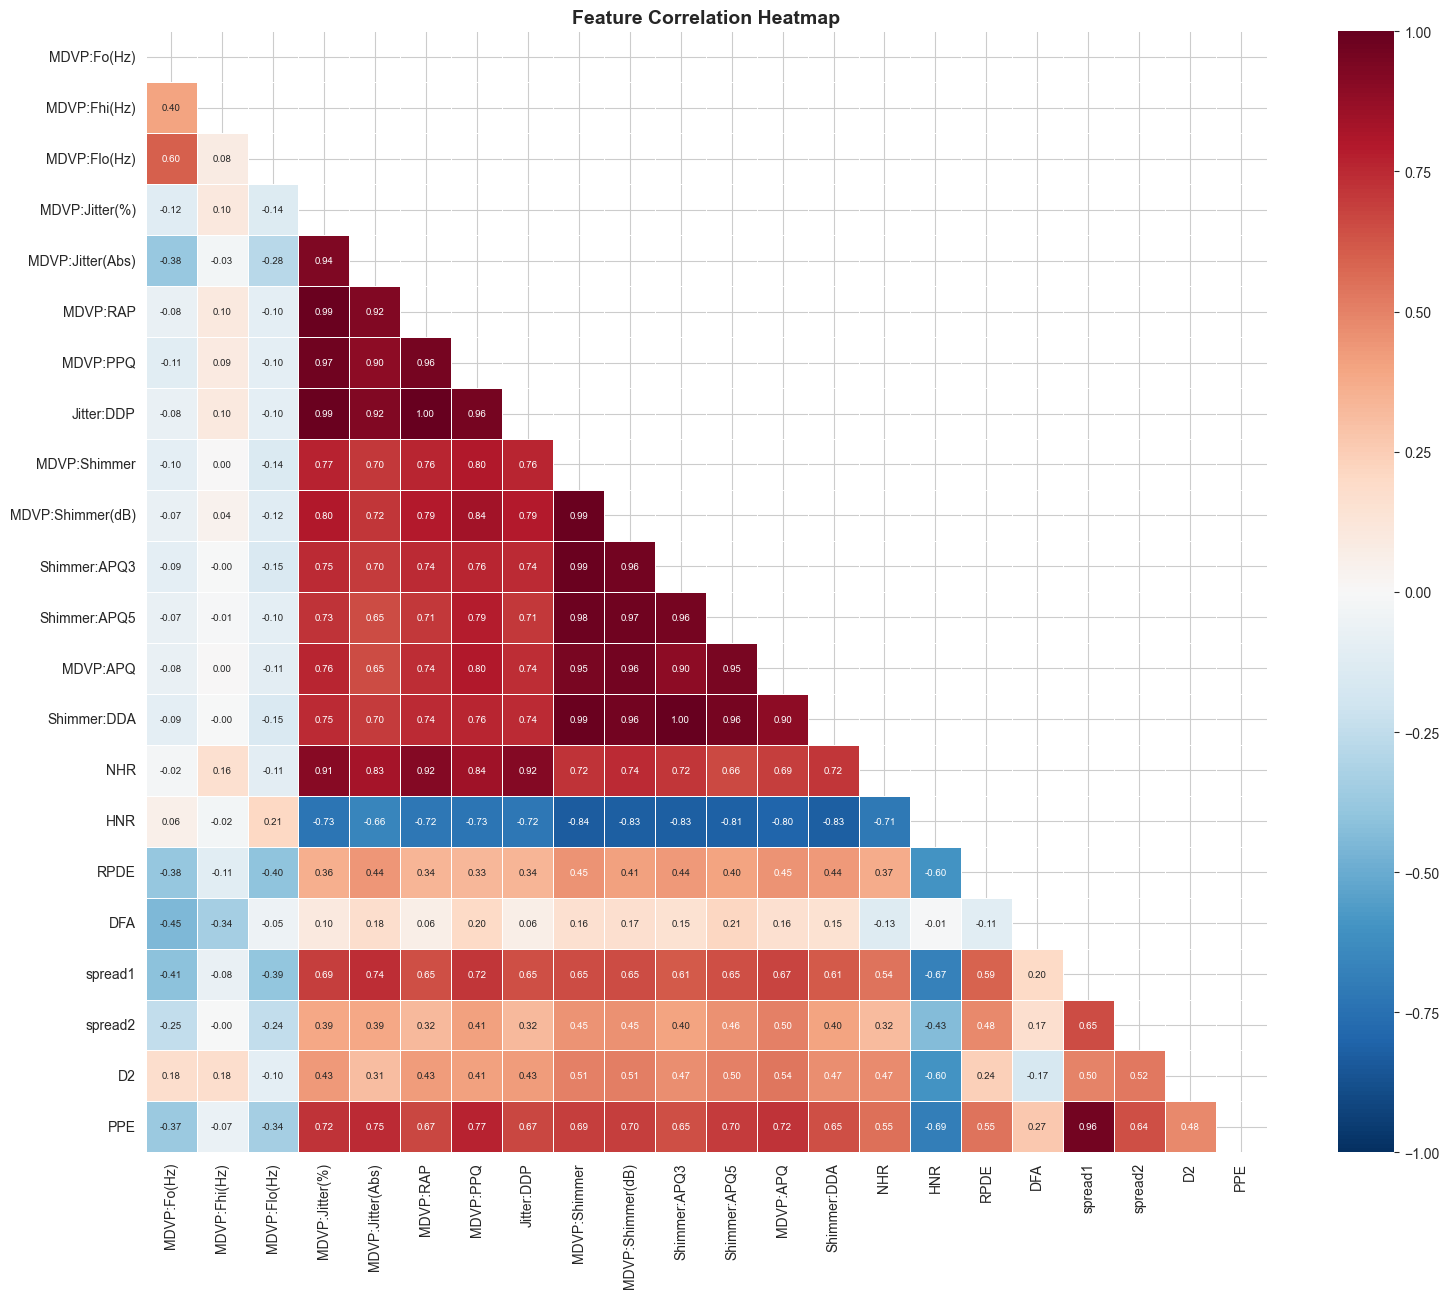

In [42]:
# Full correlation heatmap
corr = df[feature_cols].corr()

fig, ax = plt.subplots(figsize=(16, 13))
mask = np.triu(np.ones_like(corr, dtype=bool))  # show lower triangle only
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 7})
ax.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap.png', bbox_inches='tight')
plt.show()

In [43]:
# Identify highly correlated feature pairs (|r| > 0.90)
high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.90:
            high_corr_pairs.append({
                'Feature 1': corr.columns[i],
                'Feature 2': corr.columns[j],
                'Correlation': round(r, 4)
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False, key=abs)
print(f'Feature pairs with |r| > 0.90: {len(high_corr_df)}')
high_corr_df

Feature pairs with |r| > 0.90: 26


,Feature 1,Feature 2,Correlation
22,Shimmer:APQ3,Shimmer:DDA,1.0000
8,MDVP:RAP,Jitter:DDP,1.0000
3,MDVP:Jitter(%),Jitter:DDP,0.9903
1,MDVP:Jitter(%),MDVP:RAP,0.9903
13,MDVP:Shimmer,Shimmer:APQ3,0.9876
16,MDVP:Shimmer,Shimmer:DDA,0.9876
12,MDVP:Shimmer,MDVP:Shimmer(dB),0.9873
14,MDVP:Shimmer,Shimmer:APQ5,0.9828
2,MDVP:Jitter(%),MDVP:PPQ,0.9743
18,MDVP:Shimmer(dB),Shimmer:APQ5,0.9738


In [44]:
# Verify exact linear relationships mentioned in literature
print('Jitter:DDP vs 3 * MDVP:RAP (should be ~1.0):')
print(f'  Max difference: {(df["Jitter:DDP"] - 3 * df["MDVP:RAP"]).abs().max():.10f}')

print('\nShimmer:DDA vs 3 * Shimmer:APQ3 (should be ~1.0):')
print(f'  Max difference: {(df["Shimmer:DDA"] - 3 * df["Shimmer:APQ3"]).abs().max():.10f}')

Jitter:DDP vs 3 * MDVP:RAP (should be ~1.0):
  Max difference: 0.0000100000

Shimmer:DDA vs 3 * Shimmer:APQ3 (should be ~1.0):
  Max difference: 0.0000100000


In [45]:
# Variance Inflation Factor (VIF) — quantifies multicollinearity
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df[feature_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

# VIF = 1/(1-R^2) for each feature regressed on all others
from numpy.linalg import inv

corr_matrix = X_scaled_df.corr().values
try:
    vif_values = np.diag(inv(corr_matrix))
    vif_df = pd.DataFrame({'Feature': feature_cols, 'VIF': vif_values}).sort_values('VIF', ascending=False)
    vif_df['VIF'] = vif_df['VIF'].round(2)
    print('Variance Inflation Factors (VIF > 10 indicates severe multicollinearity):')
    print(vif_df.to_string(index=False))
except np.linalg.LinAlgError:
    print('Correlation matrix is singular — perfect multicollinearity detected.')
    print('This confirms redundant features (e.g., Jitter:DDP = 3*MDVP:RAP).')
    print('Feature selection / PCA is essential for this dataset.')

Variance Inflation Factors (VIF > 10 indicates severe multicollinearity):
         Feature         VIF
    Shimmer:APQ3 15086071.20
     Shimmer:DDA 15077980.36
      Jitter:DDP  1395141.42
        MDVP:RAP  1394371.17
    MDVP:Shimmer      759.77
  MDVP:Jitter(%)      191.98
        MDVP:PPQ      108.10
    Shimmer:APQ5      106.42
MDVP:Shimmer(dB)       99.30
        MDVP:APQ       61.93
MDVP:Jitter(Abs)       47.17
             PPE       28.25
         spread1       20.71
             NHR       11.65
             HNR        7.33
     MDVP:Fo(Hz)        7.10
            RPDE        3.79
              D2        3.48
             DFA        3.04
         spread2        2.89
    MDVP:Flo(Hz)        2.22
    MDVP:Fhi(Hz)        1.57


## 7. Correlation with Target Variable

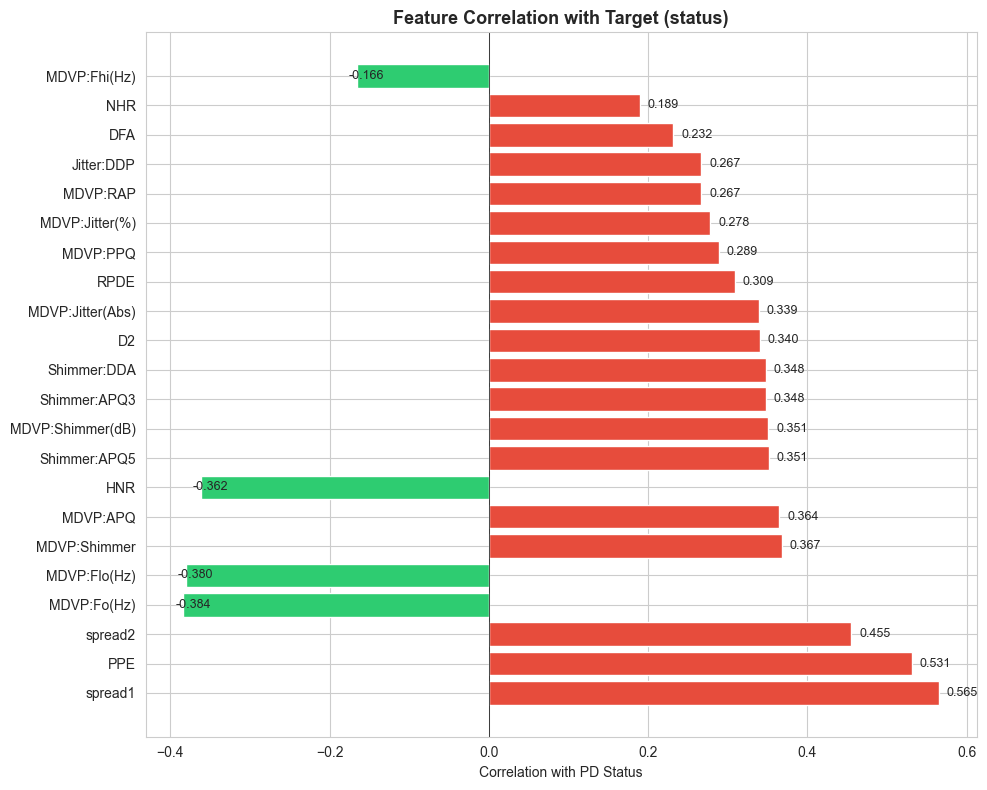


Top 5 most correlated features with PD status:
  spread1: r = 0.5648 (higher in PD)
  PPE: r = 0.5310 (higher in PD)
  spread2: r = 0.4548 (higher in PD)
  MDVP:Fo(Hz): r = -0.3835 (lower in PD)
  MDVP:Flo(Hz): r = -0.3802 (lower in PD)


In [46]:
# Point-biserial correlation of each feature with PD status
target_corr = df[feature_cols].corrwith(df['status']).sort_values(key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if v > 0 else '#2ecc71' for v in target_corr.values]
ax.barh(target_corr.index, target_corr.values, color=colors, edgecolor='white')
ax.set_xlabel('Correlation with PD Status')
ax.set_title('Feature Correlation with Target (status)', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linewidth=0.5)

# Annotate values
for i, (feat, val) in enumerate(target_corr.items()):
    ax.text(val + 0.01 * np.sign(val), i, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../figures/target_correlation.png', bbox_inches='tight')
plt.show()

print('\nTop 5 most correlated features with PD status:')
for feat, val in target_corr.head(5).items():
    direction = 'higher in PD' if val > 0 else 'lower in PD'
    print(f'  {feat}: r = {val:.4f} ({direction})')

## 8. Key EDA Takeaways

Summarize findings here after running the notebook:

1. **Dataset**: 195 recordings from ___ subjects (___ PD, ___ healthy), no missing values
2. **Class imbalance**: ~3:1 PD to healthy ratio → need balancing strategies (SMOTE, class weighting)
3. **Naive baseline**: Predicting all PD gives ___% accuracy → must use balanced metrics
4. **Multicollinearity**: Severe within jitter and shimmer groups; exact linear relationships confirmed (Jitter:DDP = 3×MDVP:RAP, Shimmer:DDA = 3×Shimmer:APQ3). VIF analysis shows ___
5. **Most discriminative features**: ___ (fill in from correlation analysis)
6. **Subject structure**: ~6 recordings per subject → subject-wise CV is mandatory

**Next step**: Notebook 02 — Preprocessing Pipeline